In [1]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [2]:
# Load the dataset 'coins.csv' using pandas' read_csv function.
coins = pd.read_csv("coins.csv")
coins.tail(10)

,reflectance,weight,denomination
169,26.913923,5.611840,2
170,27.800820,5.595559,2
171,28.444039,6.162531,2
172,28.414699,4.792008,2
173,28.869236,5.383916,2
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


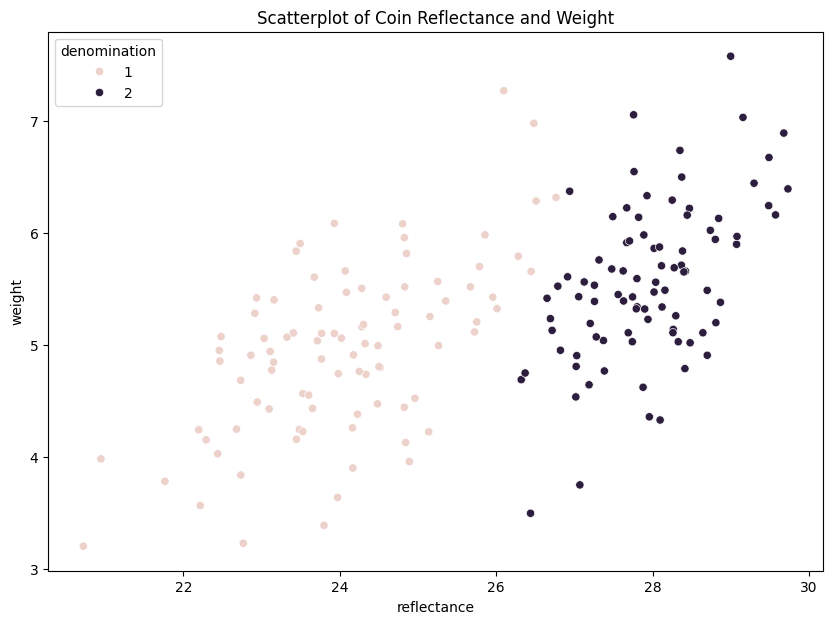

In [3]:
# Visualize the data distribution using a scatterplot
sns.scatterplot(x="reflectance", y="weight", data=coins, hue="denomination")
plt.title("Scatterplot of Coin Reflectance and Weight")
plt.show()

In [4]:
# [STUDENT SECTION: Prepare the data for training and testing]
# 1. Data Preparation:
# Prepare the input features (X) 
X = coins[["reflectance", "weight"]].to_numpy()

# Convert the denomination values (1 and 2) to binary labels (0 and 1) for binary classification.
# Hint: Subtract 1 from the denomination values to convert them to 0 and 1.
y = coins['denomination'].values - 1 # Change this

# Split the data into training and testing sets using train_test_split.
# Use an 80/20 split for training and testing and random_state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Set the arguments for train_test_split

# Normalize the input test and train features using StandardScaler to standardize reflectance and weight values.
scaler = StandardScaler()
# Use the scaler's fit_transform and transform methods to standardize the training and testing features.
#  (See https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [12]:
# [STUDENT SECTION: Define and compile the model]
# 2. Instantiate and Train the Model
# - Build a neural network model using TensorFlow/Keras.
# - The model should have:
#    - An input layer with 2 input features (reflectance and weight).
#    - 1 or 2 hidden layers with the number of neurons at your discretion (use 'relu' activation).
#      (Experiment to find the best accuracy)
#    - An output layer with 1 neuron and 'sigmoid' activation for binary classification.
model = Sequential() #define model
model.add(Dense(10, activation='relu', input_shape=(2,))) #input
model.add(Dense(5, activation = 'relu')) #hidden layer
model.add(Dense(1, activation='sigmoid')) #output layer

# - Compile the model using Adam optimizer with a learning rate of 0.001,
#   binary_crossentropy as the loss function, and 'accuracy' as the metric.
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#the above has nice accuracy


# - Train the model using X_train and y_train.
#    - Set validation_split to 0.2.
#    - Use EarlyStopping with patience=5 to prevent overfitting.
#    - Train the model for 100 epochs and use a batch size of 32.
# call the appropriate function to train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


Epoch 1/100


/home/kyra/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9018 - loss: 0.6091 - val_accuracy: 1.0000 - val_loss: 0.5901
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9236 - loss: 0.5990 - val_accuracy: 1.0000 - val_loss: 0.5816
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9247 - loss: 0.5921 - val_accuracy: 1.0000 - val_loss: 0.5731
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9469 - loss: 0.5793 - val_accuracy: 1.0000 - val_loss: 0.5645
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9338 - loss: 0.5775 - val_accuracy: 1.0000 - val_loss: 0.5558
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9484 - loss: 0.5721 - val_accuracy: 1.0000 - val_loss: 0.5470
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9595 - loss: 0.5657 - val_accuracy: 1.0000 - val_loss: 0.5380
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9408 - loss: 0.5595 - val_accuracy: 1.0000 - val_loss: 0.5288
Epoch 9/100

**#experiement with the accuracy if used only 1 middle layer vs. 2 and so on**

In [13]:
# [STUDENT SECTION: Evaluate the model]
# Hint:
# - Call model.evaluate() on the test set (X_test, y_test) and print the test accuracy.
loss,acc = model.evaluate(X_test, y_test)
print("accuracy: ", acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0575 
accuracy:  1.0


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step


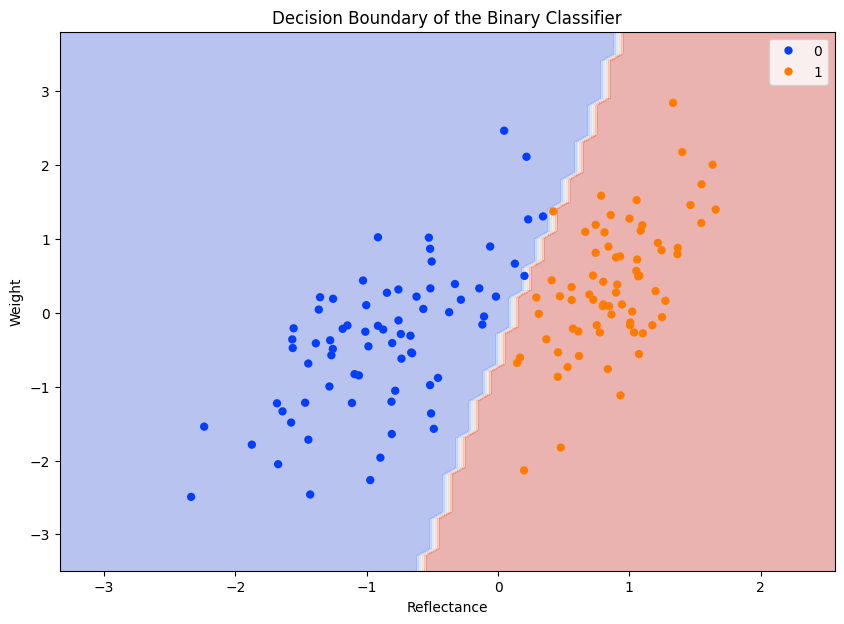

In [14]:
# 4. Plot the Decision Boundary:
# - Define a function to plot the decision boundary of the trained model. This function should take in the feature matrix X, the labels y, and the trained model.
# - This function should:
#    - Generate a mesh grid over the feature space (reflectance and weight).
#    - Use the model to predict labels for each point in the mesh grid.
#    - Plot the decision boundary using contourf.
#    - Overlay the training data points using seaborn's scatterplot.
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten(), palette='bright', edgecolor="none")
    plt.xlabel('Reflectance')
    plt.ylabel('Weight')
    plt.title('Decision Boundary of the Binary Classifier')
    plt.show()


# [STUDENT SECTION: Call the function to plot the decision boundary by passing the correct arguments]
plot_decision_boundary(X_train, y_train, model)




In [8]:
# 5. Save the Trained Model:
# - Save the trained model to a file named 'model.h5' using model.save().
model.save('model.h5')

# [STUDENT SECTION: Save the model]

# 6. Load the Saved Model and Use it to evaluate the "test" data:
# - Load the model using keras.models.load_model and re-evaluate it on the test data.
model2 = load_model('model.h5')
loss,acc = model2.evaluate(X_test, y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.2906  


In [4]:
# query iot sitewise
import boto3

asset_id = 'f61fd66e-ccd5-4eb3-9bd8-9cf88ce84c92'
temp_id = 'ee288f99-f1dc-4124-a346-c85e12f6c305'
hum_id = 'dd024614-b04b-4820-91e9-48442c8982bf'

sitewise_client = boto3.client('iotsitewise')

try:
    temp = sitewise_client.get_asset_property_value(
        assetId=temp_id,
        propertyId=property_id
    )
    hum = sitewise_client.get_asset_property_value(
        assetId=hum_id,
        propertyId=property_id
    )
except Exception as e:
        print("Error:", e)


print(f"Temperature: {temp['propertyValue']}")
print(f"Humidity: {hum['propertyValue']}")

NoRegionError: You must specify a region.

In [9]:
# 7. [STUDENT SECTION: Evaluate the loaded model on the test data]
# the accuracy of the loaded model on the test data.  Examine the output
# of predict and think about how to compute the accuracy of the predictions using
# the y_test data.  Hint:  You may need to round the predictions to 0 or 1 using np.round()
# When you use model.predict() in a binary classification problem, the output is usually 
# a 2D array where each element is a list containing a single predicted probability 
# (e.g., [[0.1], [0.9], [0.3], ...]). To compare these predictions to your 1D y_test array 
# (e.g., [0, 1, 0, ...]), you need to "flatten()" the 2D array into a 1D array.
y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).flatten()

# print the accuracy of the loaded model on the test data
accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
accuracy:  0.9722222222222222
